<a href="https://colab.research.google.com/github/Yang-Jiaxiang/AI-automatic-rendering-of-car-license-plate-system/blob/main/%E3%80%8C%E6%A5%8A%E5%98%89%E7%BF%94_hw_3_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 宣告

In [5]:
# 宣告 a_read 變數
a_read = [
    '@HWI-ST491:153:D0B6LACXX:3:1101:1209:2220 1:N:0:',
    'TTG8TATC8TCCTGGGCTgggTTG1GGACCA1CCGGCagttGTCTGG',
    '+',
    'CCFFFFFFHHHHFGIJJJJJJCCJJCJCJJJJCJJJJJJJJJJJCJH']

# 第一題：How many occurrences for each base?

In [21]:
# 取的基因定序值
a_read_data = a_read[1]

# 將基因定序值轉換為小寫形式
a_read_data_upper = a_read_data.upper()

base_count = {}
the_bases = a_read_data_upper
the_quals = a_read[3]

for i in range(len(a_read[1])):
  if(the_bases[i] in base_count):
    base_count[the_bases[i]] += 1
  else:
    base_count[the_bases[i]] = 1

# 使用氣泡排序對 base_count 中的鹼基按照出現次數遞增排序
sorted_keys = list(base_count.keys())
n = len(sorted_keys)
for i in range(n):
    for j in range(0, n-i-1):
        if base_count[sorted_keys[j]] < base_count[sorted_keys[j+1]]:
            sorted_keys[j], sorted_keys[j+1] = sorted_keys[j+1], sorted_keys[j]

# 列印結果
for key in sorted_keys:
    print(key, ":", base_count[key], end=",")
print()

G : 16,T : 13,C : 10,A : 4,


# 第二題：Calculate the mean, max, min, and stdev of the quality scores

In [20]:
# 移除不是 'T'、'G'、'A'、'C' 的值
a_read[1] = ''.join(base for base in a_read[1] if base.upper() in ['T', 'G', 'A', 'C'])

# 移除品質分數中與基因序列不對應的分數
a_read[3] = a_read[3][:len(a_read[1])]

# ASCII碼值
the_quals_values = list(map(lambda x: ord(x),list(the_quals)))

# 計算質量得分的總和、最大值和最小值
total_score = sum(the_quals_values)
max_score = max(the_quals_values)
min_score = min(the_quals_values)

# 計算質量得分的平均值
average_score = total_score / len(the_quals_values)

# 計算質量得分的標準差
sum_squared_diff = sum((score - average_score) ** 2 for score in the_quals_values)
std_deviation = (sum_squared_diff / len(the_quals_values)) ** 0.5

# 列印結果
print("mean:", average_score)
print("max:", max_score)
print("min:", min_score)

mean: 71.91489361702128
max: 74
min: 67


# 第三題：Print out the positions and the bases that have the lowest quality scores

In [31]:
# 找到質量分數最低的位置（索引值）
lowest_score_positions = [i for i, score in enumerate(the_quals_values) if score == min_score]

print(lowest_score_positions)

# 找到對應的鹼基
lowest_score_base = the_bases[lowest_score_index]

# 列印結果
for pos in lowest_score_positions:
    base = the_bases[pos]
    print("Position:", pos, ", Base:", base)

[0, 1, 21, 22, 25, 27, 32]
Position: 0 , Base: T
Position: 1 , Base: T
Position: 21 , Base: G
Position: 22 , Base: G
Position: 25 , Base: C
Position: 27 , Base: A
Position: 32 , Base: C


# 第四題：Use PyLab to generate a bar chart (長條圖) to visualize the occurrences of different bases in this read\

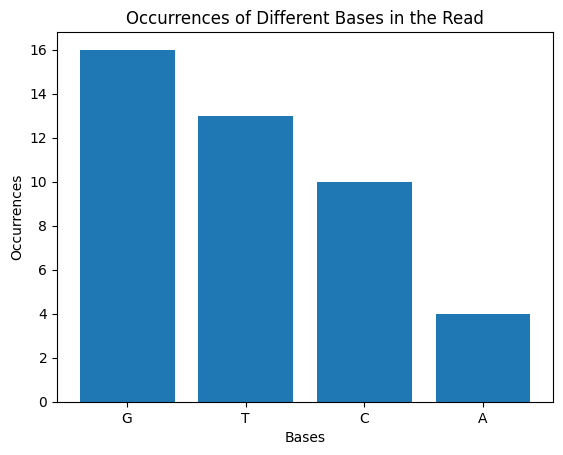

In [33]:
import matplotlib.pyplot as plt

# 生成長條圖
plt.bar(sorted_keys, [base_count[key] for key in sorted_keys])
plt.xlabel('Bases')
plt.ylabel('Occurrences')
plt.title('Occurrences of Different Bases in the Read')
plt.show()